## Logistic Regression

In [97]:
# logistic regression
import numpy as np

def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def hypothesis(theta, X):
    """Logistic regression hypothesis function."""
    return sigmoid(np.dot(X, theta))

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    """Gradient descent to optimize logistic regression."""
    m = len(y)
    for iteration in range(num_iterations):
        h = hypothesis(theta, X)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta

def logistic_regression(X, y, learning_rate, num_iterations):
    """Train a logistic regression model."""
    X = np.insert(X, 0, 1, axis=1)  # Add a bias term (intercept) to the feature matrix
    theta = np.zeros(X.shape[1])  # Initialize model parameters
    theta = gradient_descent(X, y, theta, learning_rate, num_iterations)
    return theta

def cross_validation(X, y, num_folds=5, learning_rate=0.01, num_iterations=1000):
    """Perform k-fold cross-validation for logistic regression."""
    fold_size = len(X) // num_folds
    metrics = []

    for fold in range(num_folds):
        # Split data into training and test sets for the current fold
        start_idx = fold * fold_size
        end_idx = (fold + 1) * fold_size
        X_train = np.concatenate((X[:start_idx], X[end_idx:]), axis=0)
        y_train = np.concatenate((y[:start_idx], y[end_idx:]), axis=0)
        X_test = X[start_idx:end_idx]
        y_test = y[start_idx:end_idx]

        # Train the logistic regression model
        theta = logistic_regression(X_train, y_train, learning_rate, num_iterations)

        # Make predictions on the test set
        X_test = np.insert(X_test, 0, 1, axis=1)  # Add bias term to test data
        predictions = (hypothesis(theta, X_test) >= 0.5).astype(int)

        # Calculate evaluation metrics
        accuracy = np.mean(predictions == y_test)
        precision = np.sum((predictions == 1) & (y_test == 1)) / np.sum(predictions == 1)
        recall = np.sum((predictions == 1) & (y_test == 1)) / np.sum(y_test == 1)

        metrics.append((accuracy, precision, recall))

    return metrics

In [98]:
# read in data into np array 
import csv
import numpy as np
filepath = r"C:\Users\Nicor\OneDrive\Documents\Sem 9\ECE 760\HW3\hw3Data-3\hw3Data\emails.csv"

data_rows = []
labels = []

# Open the CSV file and read its contents
with open(filepath, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Read the labels from the first row
    labels = next(csv_reader)
    
    # Read the data rows
    for row in csv_reader:
        data_rows.append(row)

# Convert data rows to a NumPy array (assuming the data is numeric)
data_array = [row[1:] for row in data_rows]
data_array = np.array(data_array, dtype=float)

# separate into features and labels
X = data_array[:,:-1]
y = data_array[:,-1]

In [100]:
metrics = cross_validation(X, y, num_folds=5, learning_rate=0.01, num_iterations=1000)

C:\Users\Nicor\AppData\Local\Temp\ipykernel_14612\4193437275.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [101]:
metrics

[(0.914, 0.8841698841698842, 0.8035087719298246),
 (0.897, 0.8320610687022901, 0.7870036101083032),
 (0.883, 0.8957345971563981, 0.6654929577464789),
 (0.82, 0.9253731343283582, 0.4217687074829932),
 (0.851, 0.79182156133829, 0.696078431372549)]

## KNN

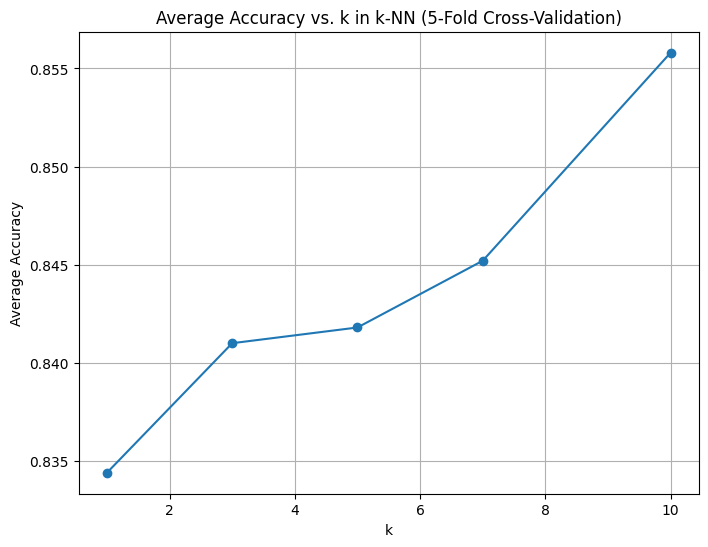

k = 1: Average Accuracy = 0.8344
k = 3: Average Accuracy = 0.8410
k = 5: Average Accuracy = 0.8418
k = 7: Average Accuracy = 0.8452
k = 10: Average Accuracy = 0.8558


In [15]:
# knn function
import numpy as np
import matplotlib.pyplot as plt

def knn(train_data, train_labels, test_instance, k):
    """
    k-Nearest Neighbors (k-NN) classification algorithm.

    Parameters:
    - train_data: NumPy array, training data with shape (n_samples, n_features).
    - train_labels: NumPy array, labels for the training data with shape (n_samples,).
    - test_instance: NumPy array, a single instance to classify with shape (n_features,).
    - k: int, the number of neighbors to consider (default is 1).

    Returns:
    - predicted_label: int, the predicted class label for the test_instance.
    """

    # Calculate distances between the test instance and all training instances
    distances = np.linalg.norm(train_data - test_instance, axis=1)

    # Sort the distances and get the indices of the closest k neighbors
    closest_indices = np.argsort(distances)[:k]

    # Get the labels of the k nearest neighbors
    nearest_labels = train_labels[closest_indices]
    nearest_labels = np.array(nearest_labels).astype(int)

    # Find the most common class label among the k nearest neighbors
    predicted_label = np.bincount(nearest_labels).argmax()

    return predicted_label


# Define the number of folds
num_folds = 5
fold_size = len(X) // num_folds

# Values of k to evaluate
k_values = [1, 3, 5, 7, 10]

# Lists to store average accuracies for each k
average_accuracies = []

# Perform 5-fold cross-validation for each value of k
for k in k_values:
    accuracies = []

    for fold in range(num_folds):
        start_idx = fold * fold_size
        end_idx = (fold + 1) * fold_size

        # Split data into training and test sets for the current fold
        X_train = np.concatenate((X[:start_idx], X[end_idx:]), axis=0)
        y_train = np.concatenate((y[:start_idx], y[end_idx:]), axis=0)
        X_test = X[start_idx:end_idx]
        y_test = y[start_idx:end_idx]

        # Perform k-NN classification for each test instance
        predictions = [knn(X_train, y_train, test_instance, k) for test_instance in X_test]

        # Calculate accuracy for this fold
        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)

    # Calculate the average accuracy for this value of k
    average_accuracy = np.mean(accuracies)
    average_accuracies.append(average_accuracy)

# Plot average accuracy versus k
plt.figure(figsize=(8, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.title('Average Accuracy vs. k in k-NN (5-Fold Cross-Validation)')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

# Print the average accuracy of each case
for k, avg_accuracy in zip(k_values, average_accuracies):
    print(f'k = {k}: Average Accuracy = {avg_accuracy:.4f}')


## ROC curves

In [92]:
def knn_proba(train_data, train_labels, test_instance, k):
    """
    k-Nearest Neighbors (k-NN) classification algorithm.

    Parameters:
    - train_data: NumPy array, training data with shape (n_samples, n_features).
    - train_labels: NumPy array, labels for the training data with shape (n_samples,).
    - test_instance: NumPy array, a single instance to classify with shape (n_features,).
    - k: int, the number of neighbors to consider (default is 1).

    Returns:
    - predicted_label: int, the predicted class label for the test_instance.
    """

    # Calculate distances between the test instance and all training instances
    distances = np.linalg.norm(train_data - test_instance, axis=1)

    # Sort the distances and get the indices of the closest k neighbors
    closest_indices = np.argsort(distances)[:k]

    # Get the labels of the k nearest neighbors
    nearest_labels = train_labels[closest_indices]
    nearest_labels = np.array(nearest_labels).astype(int)

    # Find the most common class label among the k nearest neighbors
    proba = np.sum(nearest_labels) / k

    return proba

def roc_curve(y_test, y_pred_proba):
    probabilities = y_pred_proba
    thresholds = np.linspace(0, 1, 1000)
    tpr = []
    fpr = []

    for threshold in thresholds:
        predictions = (probabilities >= threshold).astype(int)
        true_positives = np.sum((predictions == 1) & (y_test == 1))
        false_positives = np.sum((predictions == 1) & (y_test == 0))
        true_negatives = np.sum((predictions == 0) & (y_test == 0))
        false_negatives = np.sum((predictions == 0) & (y_test == 1))

        tpr.append(true_positives / (true_positives + false_negatives))
        fpr.append(false_positives / (false_positives + true_negatives))

    return fpr, tpr

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Split the data into a training set and a test set
fold = 1
start_idx = fold * fold_size
end_idx = (fold + 1) * fold_size
X_train = np.concatenate((X[:start_idx], X[end_idx:]), axis=0)
y_train = np.concatenate((y[:start_idx], y[end_idx:]), axis=0)
X_test = X[start_idx:end_idx]
y_test = y[start_idx:end_idx]

In [61]:
# Train logistic regression on the training set and get the best theta
theta_logistic = logistic_regression(X_train, y_train, learning_rate=0.01, num_iterations=1000)

label_probabilities = sigmoid(np.dot(np.insert(X_test, 0, 1, axis=1), theta_logistic))

fpr_logistic, tpr_logistic = roc_curve(y_test, label_probabilities)

C:\Users\Nicor\AppData\Local\Temp\ipykernel_14612\4193437275.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [94]:
# Train KNN
knn_proba = np.array([knn_proba(X_train, y_train,test_instance,k=5) for test_instance in X_test])

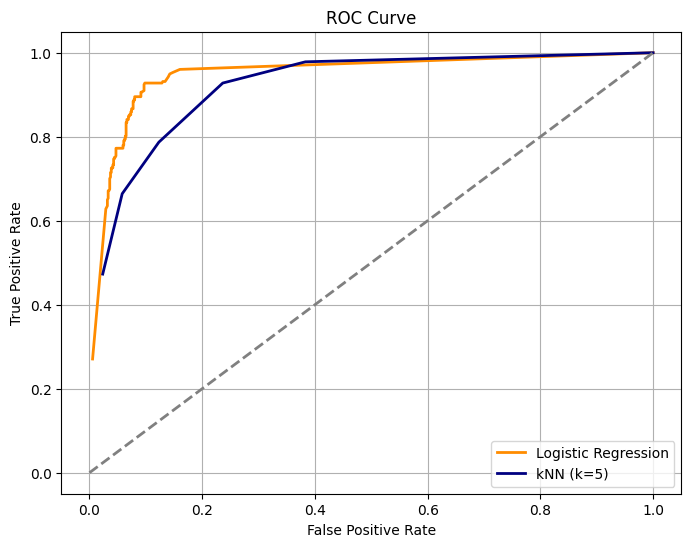

In [96]:
fpr_knn, tpr_knn = roc_curve(y_test, knn_proba)
fpr_knn = np.array(fpr_knn)

# Plot ROC curves for both logistic regression and kNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, color='navy', lw=2, label='kNN (k=5)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

c:\Users\Nicor\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


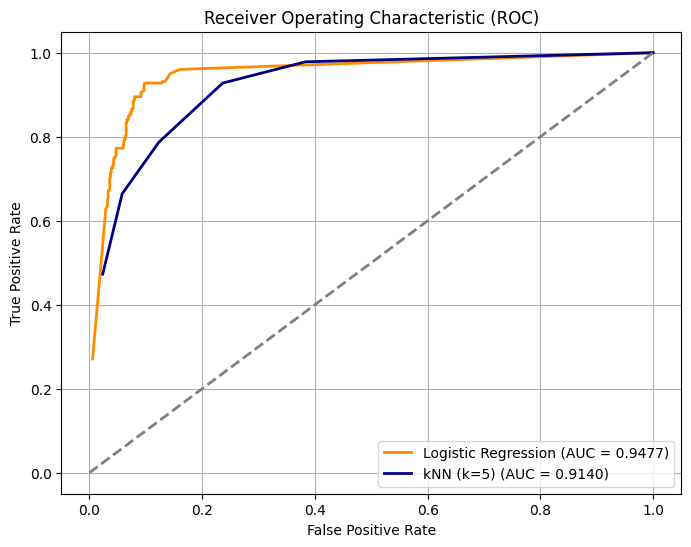

AUC for Logistic Regression: 0.9477
AUC for kNN (k=5): 0.9140


In [102]:
from sklearn.metrics import auc

# Calculate AUC for logistic regression ROC curve
auc_logistic = auc(fpr_logistic, tpr_logistic)

# Calculate AUC for kNN ROC curve
auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves for both logistic regression and kNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {auc_logistic:.4f})')
plt.plot(fpr_knn, tpr_knn, color='navy', lw=2, label=f'kNN (k=5) (AUC = {auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for Logistic Regression: {auc_logistic:.4f}")
print(f"AUC for kNN (k=5): {auc_knn:.4f}")
